# Programming Exercise Solution
Student Name : AmirMohammad Babaei \
Student ID   : 9831011 

## Import Modules
- matplotlib
- numpy

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 10)

## Question 1
Implement a function to Convolve two signals.

### Convolution Function
In this part, I implemented Convolution Operator.

In [4]:
def Convolution(x_n, h_n):
    l = len(x_n)
    h_n_reverse = np.flip(h_n)
#     print(f'h_n_reverse = {h_n_reverse}')
    result = [0 for _ in range(2*l-1)]
    for i in range(l):
#         print(f'result[{i}] = {result[i]}, h_n_reverse[{l-i-1}:]= {h_n_reverse[l-i-1:]} x_n[:{i+1}]= {x_n[:i+1]}')
        result[i] = np.dot(h_n_reverse[l-i-1:], x_n[:i+1])
    for i in range(l-1):
#         print(f'result[{i+l}]= {result[i+l]}, h_n_reverse[:{l-i-1}]= {h_n_reverse[:l-i-1]} x_n[{i+1}:]= {x_n[i+1:]}')
        result[l+i] = np.dot(h_n_reverse[:l-i-1], x_n[i+1:])
    return np.array(result)

### Test Convolution Function


In [5]:
x_test = np.array([1, 2, 3, 4])
h_test = np.array([10, 11, 12, 13])

y_test_true = np.convolve(x_test, h_test)
print('Real Convolution value: ', y_test_true)
y_test = Convolution(x_test, h_test)
print('My function Output:     ', y_test)

Real Convolution value:  [ 10  31  64 110 106  87  52]
My function Output:      [ 10  31  64 110 106  87  52]


a)\
$$x[n]=u[n+2]-2u[n-12]+u[n-20]$$
$$h[n]=0.9^n (u[n-2] - 2u[n-4])$$
Interval : $[-20, 80]$

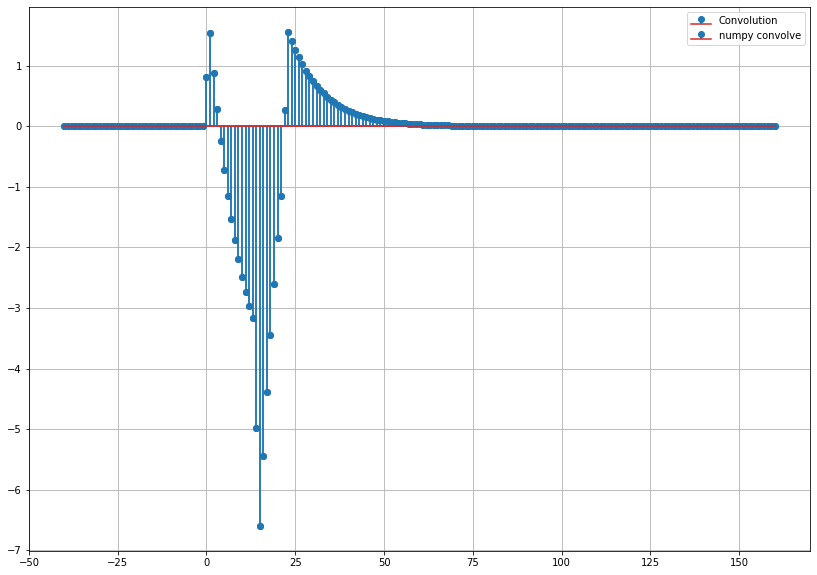

In [6]:
x1_n_func = lambda n : np.heaviside(n+2, 1) - 2*np.heaviside(n-12, 1) + np.heaviside(n-20, 1)
h1_n_func = lambda n : (0.9 ** n) * (np.heaviside(n-2, 1) - 2*np.heaviside(n-4, 1))

x1_n = np.array(list(map(x1_n_func, range(-20, 81))))
h1_n = np.array(list(map(h1_n_func, range(-20, 81))))

y1_n = Convolution(x1_n, h1_n)

plt.stem(np.arange(-40, 161), y1_n, label='Convolution')
plt.stem(np.arange(-40, 161), np.convolve(x1_n, h1_n), label='numpy convolve')
plt.legend()
plt.grid(True)

b)\
$$x(t) = \cos (t)[u(t+2) - u(t-2)]$$
$$h(t) = e^{-4t}u(t)$$
interval = $[-15, 15]$, step = $0.1$

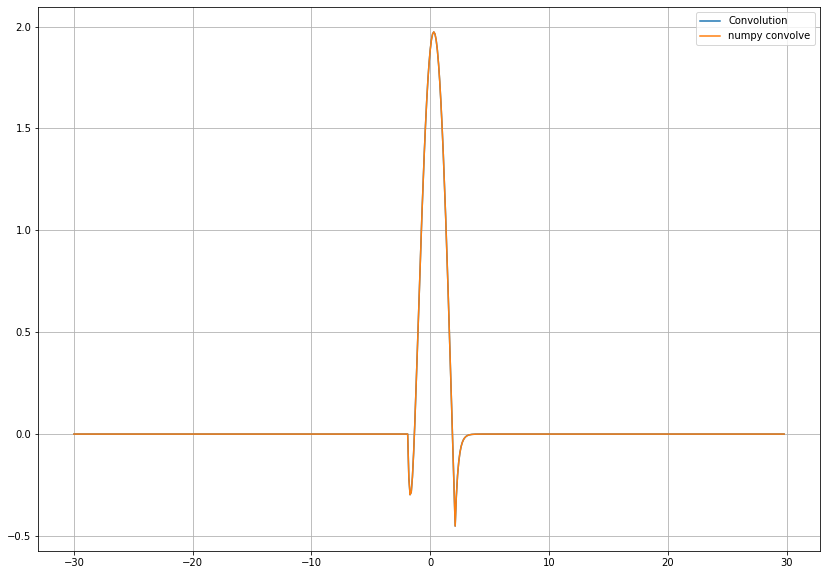

In [7]:
x2_t_func = lambda t : np.cos(t) * (np.heaviside(t+2, 1) - np.heaviside(t-2, 1))
h2_t_func = lambda t : np.exp(-4*t) * np.heaviside(t, 1)

range_2 = np.arange(-15.0, 15.0, 0.1)

x2_t = np.array(list(map(x2_t_func, range_2)))
h2_t = np.array(list(map(h2_t_func, range_2)))

y2_t = Convolution(x2_t, h2_t)
plt.plot(np.arange(-30, 29.9, 0.1), y2_t, label='Convolution')
plt.plot(np.arange(-30, 29.9, 0.1), np.convolve(x2_t, h2_t), label='numpy convolve')
plt.legend()
plt.grid(True)

c)\
$$ x(t)=   \left\{
\begin{array}{ll}
      1 & |t| < a \\
      0 & otherwise \\
\end{array} 
\right.  $$

$$ h(t)=   \left\{
\begin{array}{ll}
      1 & |t| < 1 \\
      0 & otherwise \\
\end{array} 
\right.  $$

interval = $[-5, 5]$, step = $0.1$, $a \in \{1, 3\}$

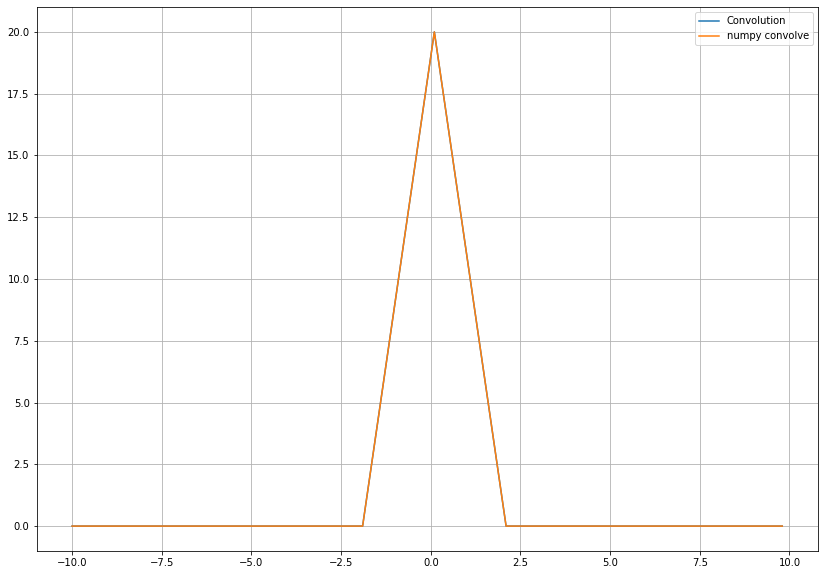

In [13]:
a=1

x3_t_func = lambda t : 1 if np.abs(t) < a else 0
h3_t_func = lambda t : 1 if np.abs(t) < 1 else 0

range_3 = np.arange(-5.0, 5.0, 0.1)

x3_t = np.array(list(map(x3_t_func, range_3)))
h3_t = np.array(list(map(h3_t_func, range_3)))

y3_t = Convolution(x3_t, h3_t)
plt.plot(np.arange(-10, 10, 0.1)[:-1], y3_t, label='Convolution')
plt.plot(np.arange(-10, 10, 0.1)[:-1], np.convolve(x3_t, h3_t), label='numpy convolve')
plt.legend()
plt.grid(True)

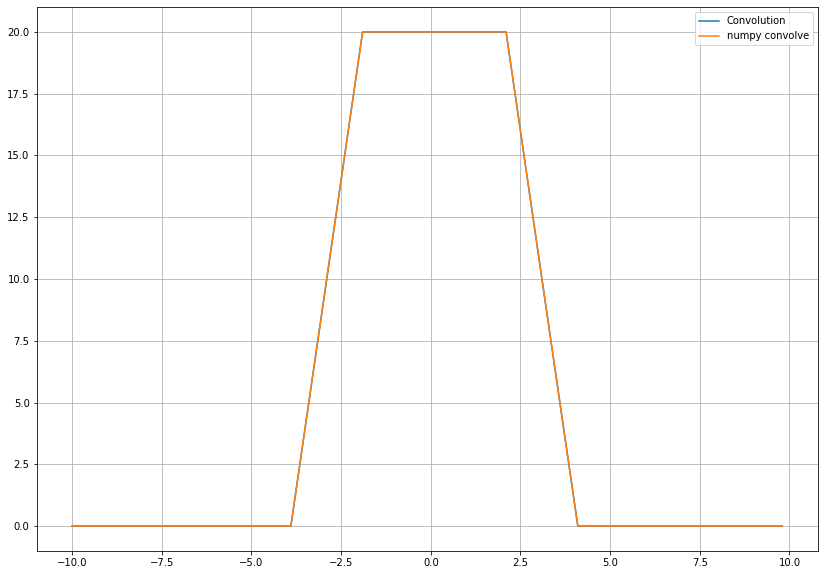

In [14]:
a=3

x4_t_func = lambda t : 1 if np.abs(t) < a else 0
h4_t_func = lambda t : 1 if np.abs(t) < 1 else 0

range_4 = np.arange(-5.0, 5.0, 0.1)

x4_t = np.array(list(map(x4_t_func, range_4)))
h4_t = np.array(list(map(h4_t_func, range_4)))

y4_t = Convolution(x4_t, h4_t)
plt.plot(np.arange(-10, 9.9, 0.1), y4_t, label='Convolution')
plt.plot(np.arange(-10, 9.9, 0.1), np.convolve(x4_t, h4_t), label='numpy convolve')
plt.legend()
plt.grid(True)

### Bonus Question: Why computed convolutions are greater than actual convolution?
In continuous-time signals, we have computed convolutions in a discrete manner. so when we add convolution sum after computing all multiplication, we just add values and ignore time step width.
$$y(t)=x(t)*h(t)=\int_{-\infty}^{+\infty} x(\tau)h(t-\tau)d\tau = \lim_{\Delta k \to +\infty} \sum_{k=-\infty}^{\infty} x(k)h(n-k)\Delta k$$ 
In discrete signals, because $\Delta k = 1$, we can skip it. but when we're computing continuous signals in a discrete manner, we need to consider $\Delta k$ and multiply it in evaluation of Convolution sum. \
**So now, what can we do to solve the issue?**\
if we multiply output signal of Convolution by time step ($\Delta k$), we can correct this equation. 

## Question 2
at first, we draw original signal. original signal has a lot of noise.

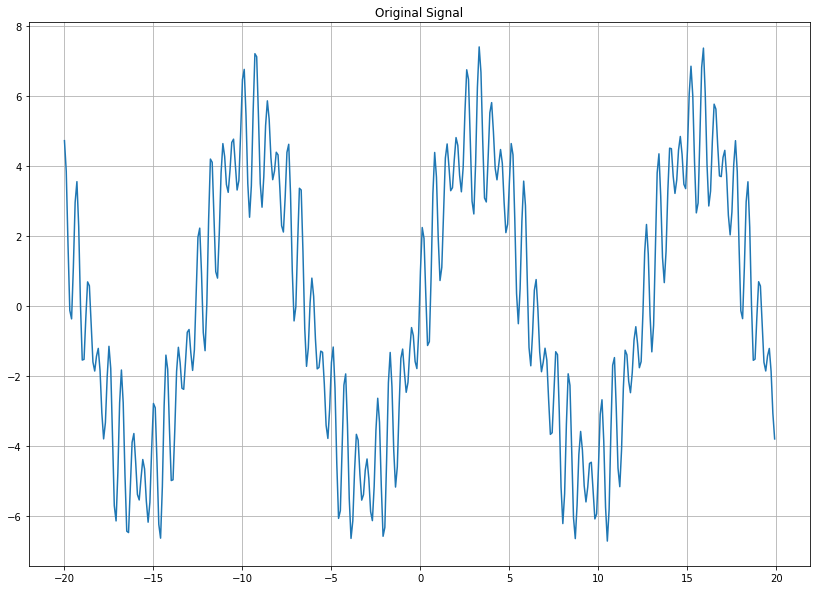

In [15]:
x5_t_func = lambda t : (3/2) * np.sin(10*t) + 5 * np.sin(t/2) + np.cos((15/2) * t)

range_5 = np.arange(-20, 20, 0.1)
x5_t = np.array(list(map(x5_t_func, range_5)))

plt.plot(range_5, x5_t)
plt.title('Original Signal')
plt.grid()

Now, I'm going to draw Convolution of $x(t)*h(t)$ for different values of a. \
$$a \in \{0.2, 1.2, 8\}$$

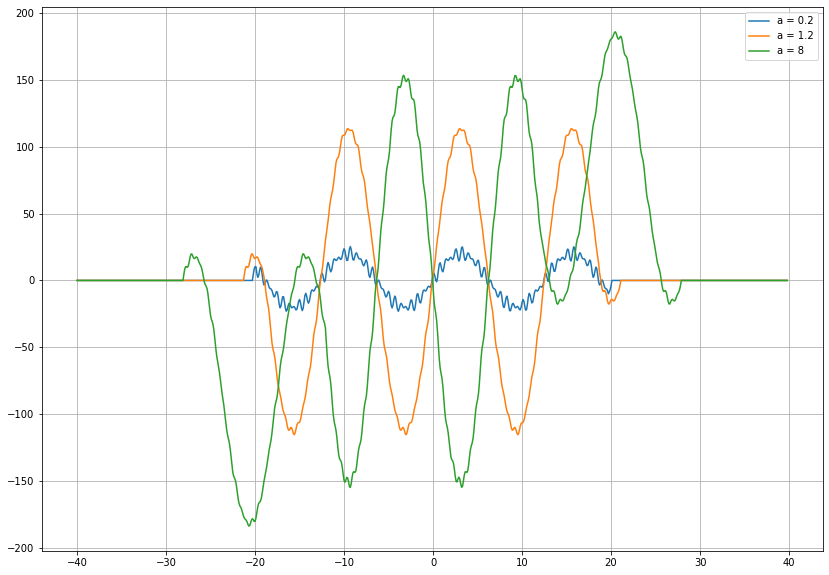

In [19]:
# a is 0.2
a = 0.2
h5_t_func = lambda t : np.heaviside(t+a, 1) - np.heaviside(t-a, 1)

h5_t_1 = np.array(list(map(h5_t_func, range_5)))
first_conv = Convolution(x5_t, h5_t_1)
plt.plot(np.arange(-40, 39.9, 0.1), first_conv, label='a = 0.2')

# a is 1.2
a = 1.2

h5_t_2 = np.array(list(map(h5_t_func, range_5)))
second_conv = Convolution(x5_t, h5_t_2)
plt.plot(np.arange(-40, 39.9, 0.1), second_conv, label='a = 1.2')

# a is 8
a = 8

h5_t_3 = np.array(list(map(h5_t_func, range_5)))
third_conv = Convolution(x5_t, h5_t_3)
plt.plot(np.arange(-40, 39.9, 0.1), third_conv, label='a = 8')

plt.legend()
plt.grid(True)

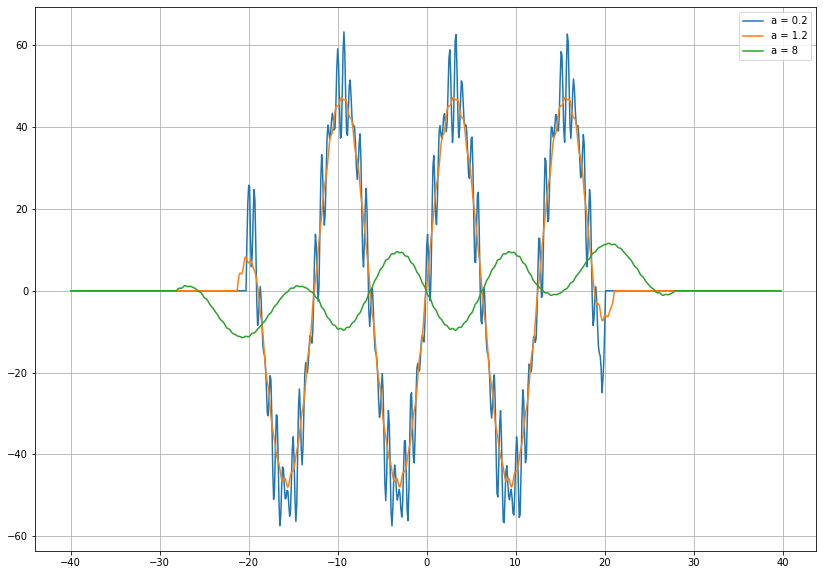

In [18]:
# a is 0.2
a = 0.2
h5_t_func = lambda t : (np.heaviside(t+a, 1) - np.heaviside(t-a, 1))/(2*a)

h5_t_1 = np.array(list(map(h5_t_func, range_5)))
first_conv = Convolution(x5_t, h5_t_1)
plt.plot(np.arange(-40, 39.9, 0.1), first_conv, label='a = 0.2')

# a is 1.2
a = 1.2

h5_t_2 = np.array(list(map(h5_t_func, range_5)))
second_conv = Convolution(x5_t, h5_t_2)
plt.plot(np.arange(-40, 39.9, 0.1), second_conv, label='a = 1.2')

# a is 8
a = 8

h5_t_3 = np.array(list(map(h5_t_func, range_5)))
third_conv = Convolution(x5_t, h5_t_3)
plt.plot(np.arange(-40, 39.9, 0.1), third_conv, label='a = 8')

plt.legend()
plt.grid(True)

### What is the effect of this convolution?
In this convolution, we compute $y(t)=x(t)*h(t)$. Because $h(t)=u(t+a)-u(t-a)$, in each step of convolution, to compute value of $y(t)$ in $t=t_0$, besides the value of $x(t_0)$, we consider values of $x(t)$ in $t \in (t_0-a, t_0+a)$.
$$y(t_0)=\sum_{k=t_0-a}^{t_0+a} x(k)$$
This relation shows us because we consider adjacent points of $t_0$, so it can avoid entering jumps of $x(t)$ to $y(t)$ and can denoise the original signal. but because we didn't average these values, as the range becomes larger, our result becomes larger. So when we increase $a$, the range becomes larger and more points are considered when we compute $y(t_0)$, and the final value of $y(t)$ becomes larger too. also, increasing $a$ will increase denoising.

### How to Fix it?
To fix this issue, just we need to do like the previous question and consider $\Delta k$ in computation or multiply output signal to $\Delta k$.\
Another thing that we can do here, is use $h(t)=\frac{u(t+a)-u(t-a)}{2a}$. In this case, when convolution is computed, range distance is considered and doesn't scale original signal. In this case, increasing $a$ will decrease noise and cancel scaling.